In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## chargement et traitement des données

In [2]:
etat_des_ascenseurs = pd.read_excel("./data_workshop/etat-des-ascenseurs.xlsx")
toilettes_publiques_en_ile_de_france = pd.read_excel("./data_workshop/toilettes-publiques-en-ile-de-france.xlsx")

In [3]:
etat_des_ascenseurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ZdcId            950 non-null    int64  
 1   ZdCXEpsg2154     950 non-null    int64  
 2   ZdCYEpsg2154     950 non-null    int64  
 3   liftId           950 non-null    int64  
 4   liftReason       61 non-null     object 
 5   liftStatus       929 non-null    object 
 6   LiftPrivateId    950 non-null    object 
 7   liftSituation    900 non-null    object 
 8   liftDirection    745 non-null    object 
 9   liftStateUpdate  929 non-null    object 
 10  LiftState        929 non-null    float64
 11  ZdcName          950 non-null    object 
 12  liftMode         950 non-null    object 
 13  ZdcCentroid      950 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 104.0+ KB


In [4]:
etat_des_ascenseurs.head()

,ZdcId,ZdCXEpsg2154,ZdCYEpsg2154,liftId,liftReason,liftStatus,LiftPrivateId,liftSituation,liftDirection,liftStateUpdate,LiftState,ZdcName,liftMode,ZdcCentroid
0,71223,652080,6861897,710,NaN,available,CITE3,Tête quai 1,Salle d'Accès,2024-09-17T20:08,1.0,Cité,Metro,"48.8553278269476, 2.3469138324847227"
1,473829,647885,6861802,373,NaN,available,BIRHAS1,Salle d'échange - Quai 1,Charles de Gaulle - Etoile,2024-09-17T20:08,1.0,Bir-Hakeim,Metro,"48.854147821522425, 2.2897561403898874"
2,69884,660632,6852237,446,NaN,available,PMR2,Accès - Quai 2,Balard,2024-09-17T20:08,1.0,Pointe du Lac,Metro,"48.76903135841051, 2.464355360670259"
3,71785,659092,6862624,740,NaN,available,MMON ASC 2,QX092,QUAI DEPART,2024-09-17T20:08,1.0,Mairie de Montreuil,Metro,"48.862349112606985, 2.4424046971684503"
4,490779,657950,6864723,1215,NaN,available,EQ11-A005-000000331,NaN,NaN,2024-09-17T20:08,1.0,Serge Gainsbourg,Metro,"48.88115156836732, 2.426631494803622"


In [5]:
etat_des_ascenseurs.isnull().sum()

ZdcId                0
ZdCXEpsg2154         0
ZdCYEpsg2154         0
liftId               0
liftReason         889
liftStatus          21
LiftPrivateId        0
liftSituation       50
liftDirection      205
liftStateUpdate     21
LiftState           21
ZdcName              0
liftMode             0
ZdcCentroid          0
dtype: int64

In [6]:
etat_des_ascenseurs["liftReason"] = etat_des_ascenseurs["liftReason"].fillna('')
etat_des_ascenseurs.isnull().sum()
etat_des_ascenseurs.head(10)

,ZdcId,ZdCXEpsg2154,ZdCYEpsg2154,liftId,liftReason,liftStatus,LiftPrivateId,liftSituation,liftDirection,liftStateUpdate,LiftState,ZdcName,liftMode,ZdcCentroid
0,71223,652080,6861897,710,,available,CITE3,Tête quai 1,Salle d'Accès,2024-09-17T20:08,1.0,Cité,Metro,"48.8553278269476, 2.3469138324847227"
1,473829,647885,6861802,373,,available,BIRHAS1,Salle d'échange - Quai 1,Charles de Gaulle - Etoile,2024-09-17T20:08,1.0,Bir-Hakeim,Metro,"48.854147821522425, 2.2897561403898874"
2,69884,660632,6852237,446,,available,PMR2,Accès - Quai 2,Balard,2024-09-17T20:08,1.0,Pointe du Lac,Metro,"48.76903135841051, 2.464355360670259"
3,71785,659092,6862624,740,,available,MMON ASC 2,QX092,QUAI DEPART,2024-09-17T20:08,1.0,Mairie de Montreuil,Metro,"48.862349112606985, 2.4424046971684503"
4,490779,657950,6864723,1215,,available,EQ11-A005-000000331,NaN,NaN,2024-09-17T20:08,1.0,Serge Gainsbourg,Metro,"48.88115156836732, 2.426631494803622"
5,490779,657950,6864723,1216,liftFailure,notavailable,EQ11-A005-000000332,NaN,NaN,2024-09-17T20:08,2.0,Serge Gainsbourg,Metro,"48.88115156836732, 2.426631494803622"
6,490782,660791,6864347,1187,,available,EQ11-A001-000000059,NaN,NaN,2024-09-17T20:08,1.0,La Dhuys,Metro,"48.87794952079799, 2.465403145134867"
7,490783,661010,6864793,1184,,available,EQ11-A005-000000318,NaN,NaN,2024-09-17T20:08,1.0,Coteaux Beauclair,Metro,"48.88197361288965, 2.468348077272814"
8,71870,655879,6864078,1087,,NaN,ASC 01 - PMR,Palier CR au bout des 2 quais - Edicule en voirie,NaN,NaN,NaN,Télégraphe,Metro,"48.87521266293494, 2.3984606497150964"
9,71897,660022,6864314,1199,,available,EQ11-A005-000000325,NaN,NaN,2024-09-17T20:08,1.0,Montreuil - Hôpital,Metro,"48.87760547813673, 2.454921616190035"


In [7]:
etat_des_ascenseurs["liftReason"].unique()

array(['', 'liftFailure', '/', 'undefinedEquipmentProblem'], dtype=object)

In [8]:
etat_des_ascenseurs["liftReason"] = etat_des_ascenseurs["liftReason"].replace('/','unkownReason')
etat_des_ascenseurs["liftReason"] = etat_des_ascenseurs["liftReason"].replace('','unkownReason')

In [9]:
etat_des_ascenseurs["liftReason"].unique()

array(['unkownReason', 'liftFailure', 'undefinedEquipmentProblem'],
      dtype=object)

In [10]:
etat_des_ascenseurs["liftStatus"] = etat_des_ascenseurs["liftStatus"].fillna('')
etat_des_ascenseurs.isnull().sum()
etat_des_ascenseurs.head()

,ZdcId,ZdCXEpsg2154,ZdCYEpsg2154,liftId,liftReason,liftStatus,LiftPrivateId,liftSituation,liftDirection,liftStateUpdate,LiftState,ZdcName,liftMode,ZdcCentroid
0,71223,652080,6861897,710,unkownReason,available,CITE3,Tête quai 1,Salle d'Accès,2024-09-17T20:08,1.0,Cité,Metro,"48.8553278269476, 2.3469138324847227"
1,473829,647885,6861802,373,unkownReason,available,BIRHAS1,Salle d'échange - Quai 1,Charles de Gaulle - Etoile,2024-09-17T20:08,1.0,Bir-Hakeim,Metro,"48.854147821522425, 2.2897561403898874"
2,69884,660632,6852237,446,unkownReason,available,PMR2,Accès - Quai 2,Balard,2024-09-17T20:08,1.0,Pointe du Lac,Metro,"48.76903135841051, 2.464355360670259"
3,71785,659092,6862624,740,unkownReason,available,MMON ASC 2,QX092,QUAI DEPART,2024-09-17T20:08,1.0,Mairie de Montreuil,Metro,"48.862349112606985, 2.4424046971684503"
4,490779,657950,6864723,1215,unkownReason,available,EQ11-A005-000000331,NaN,NaN,2024-09-17T20:08,1.0,Serge Gainsbourg,Metro,"48.88115156836732, 2.426631494803622"


In [11]:
etat_des_ascenseurs["liftSituation"] = etat_des_ascenseurs["liftSituation"].fillna('')
etat_des_ascenseurs.isnull().sum()

ZdcId                0
ZdCXEpsg2154         0
ZdCYEpsg2154         0
liftId               0
liftReason           0
liftStatus           0
LiftPrivateId        0
liftSituation        0
liftDirection      205
liftStateUpdate     21
LiftState           21
ZdcName              0
liftMode             0
ZdcCentroid          0
dtype: int64

In [12]:
etat_des_ascenseurs["liftDirection"] = etat_des_ascenseurs["liftDirection"].fillna('')
etat_des_ascenseurs.isnull().sum()

ZdcId               0
ZdCXEpsg2154        0
ZdCYEpsg2154        0
liftId              0
liftReason          0
liftStatus          0
LiftPrivateId       0
liftSituation       0
liftDirection       0
liftStateUpdate    21
LiftState          21
ZdcName             0
liftMode            0
ZdcCentroid         0
dtype: int64

In [13]:
etat_des_ascenseurs["liftStateUpdate"] = etat_des_ascenseurs["liftStateUpdate"].fillna('')
etat_des_ascenseurs.isnull().sum()

ZdcId               0
ZdCXEpsg2154        0
ZdCYEpsg2154        0
liftId              0
liftReason          0
liftStatus          0
LiftPrivateId       0
liftSituation       0
liftDirection       0
liftStateUpdate     0
LiftState          21
ZdcName             0
liftMode            0
ZdcCentroid         0
dtype: int64

In [14]:
etat_des_ascenseurs["LiftState"] = etat_des_ascenseurs["LiftState"].fillna('')
etat_des_ascenseurs.isnull().sum()

ZdcId              0
ZdCXEpsg2154       0
ZdCYEpsg2154       0
liftId             0
liftReason         0
liftStatus         0
LiftPrivateId      0
liftSituation      0
liftDirection      0
liftStateUpdate    0
LiftState          0
ZdcName            0
liftMode           0
ZdcCentroid        0
dtype: int64

In [15]:
df = pd.DataFrame(etat_des_ascenseurs)

# drop rows with null values in column 'A'
df = df.loc[df['liftStatus'] != '']
df = df.loc[df['liftStatus'] != 'unkown']

df.head(10)

,ZdcId,ZdCXEpsg2154,ZdCYEpsg2154,liftId,liftReason,liftStatus,LiftPrivateId,liftSituation,liftDirection,liftStateUpdate,LiftState,ZdcName,liftMode,ZdcCentroid
0,71223,652080,6861897,710,unkownReason,available,CITE3,Tête quai 1,Salle d'Accès,2024-09-17T20:08,1.0,Cité,Metro,"48.8553278269476, 2.3469138324847227"
1,473829,647885,6861802,373,unkownReason,available,BIRHAS1,Salle d'échange - Quai 1,Charles de Gaulle - Etoile,2024-09-17T20:08,1.0,Bir-Hakeim,Metro,"48.854147821522425, 2.2897561403898874"
2,69884,660632,6852237,446,unkownReason,available,PMR2,Accès - Quai 2,Balard,2024-09-17T20:08,1.0,Pointe du Lac,Metro,"48.76903135841051, 2.464355360670259"
3,71785,659092,6862624,740,unkownReason,available,MMON ASC 2,QX092,QUAI DEPART,2024-09-17T20:08,1.0,Mairie de Montreuil,Metro,"48.862349112606985, 2.4424046971684503"
4,490779,657950,6864723,1215,unkownReason,available,EQ11-A005-000000331,,,2024-09-17T20:08,1.0,Serge Gainsbourg,Metro,"48.88115156836732, 2.426631494803622"
5,490779,657950,6864723,1216,liftFailure,notavailable,EQ11-A005-000000332,,,2024-09-17T20:08,2.0,Serge Gainsbourg,Metro,"48.88115156836732, 2.426631494803622"
6,490782,660791,6864347,1187,unkownReason,available,EQ11-A001-000000059,,,2024-09-17T20:08,1.0,La Dhuys,Metro,"48.87794952079799, 2.465403145134867"
7,490783,661010,6864793,1184,unkownReason,available,EQ11-A005-000000318,,,2024-09-17T20:08,1.0,Coteaux Beauclair,Metro,"48.88197361288965, 2.468348077272814"
9,71897,660022,6864314,1199,unkownReason,available,EQ11-A005-000000325,,,2024-09-17T20:08,1.0,Montreuil - Hôpital,Metro,"48.87760547813673, 2.454921616190035"
10,71897,660022,6864314,1200,unkownReason,available,EQ11-A005-000000326,,,2024-09-17T20:08,1.0,Montreuil - Hôpital,Metro,"48.87760547813673, 2.454921616190035"


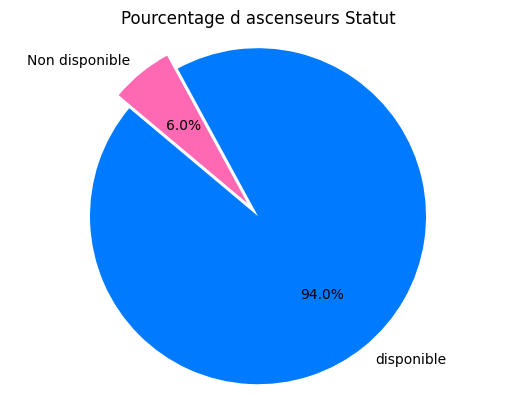

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# assume 'df' is your pandas dataframe with the column of interest
column_name = 'liftStatus'  # replace with your column name

# count the number of available and not available statuses
available_count = df['liftStatus'].eq('available').sum()
not_available_count = df['liftStatus'].eq('notavailable').sum()

# calculate the percentages
available_percentage = (available_count / len(df)) * 100
not_available_percentage = (not_available_count / len(df)) * 100

# create a pie chart
labels = ['disponible', 'Non disponible']
sizes = [available_percentage, not_available_percentage]
colors = ['#007bff', '#ff69b4']  # blue and pink colors
explode = (0.1, 0)  # explode the available slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', startangle=140)

ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle

plt.title(f'Pourcentage d ascenseurs Statut')
plt.show()

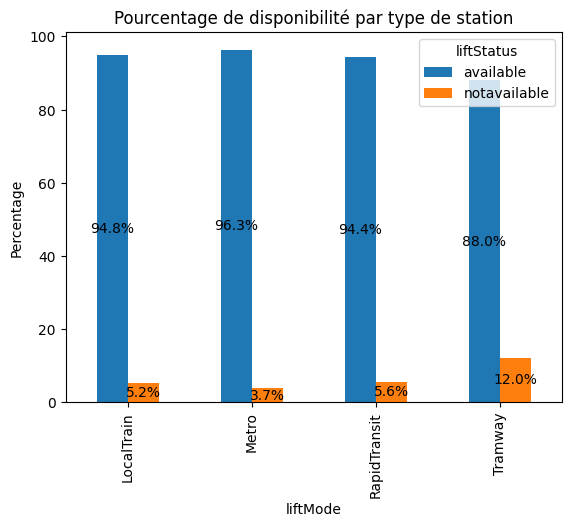

In [17]:

# assume 'df' is your pandas dataframe with the column of interest
column_name = 'liftMode'  # replace with your column name
status_column = 'liftStatus'  # replace with your status column name

# create a pivot table to count the number of available and not available for each attribute
pivot_table = pd.pivot_table(df, index=['liftMode'], columns=['liftStatus'], aggfunc='size', fill_value=0)

# calculate the percentages for each attribute
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# create a bar chart
fig, ax = plt.subplots()
pivot_table_percentage.plot(kind='bar', ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', horizontalalignment='center', verticalalignment='center')

ax.set_title(f'Pourcentage de disponibilité par type de station')
ax.set_xlabel(column_name)
ax.set_ylabel('Percentage')
ax.legend(title=status_column)

plt.show()

In [18]:
import pandas as pd

# assume 'df' is your pandas dataframe with the column of interest
column_name = 'ZdcName'  # replace with your column name
status_column = 'liftStatus'  # replace with your status column name

# create a pivot table to count the number of available and not available for each attribute
pivot_table = pd.pivot_table(df, index=column_name, columns=status_column, aggfunc='size', fill_value=0)

# calculate the percentages for each attribute
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# round the percentages to one decimal place
pivot_table_percentage = pivot_table_percentage.round(1)

# display the percentages in a table
pivot_table_percentage = pivot_table_percentage[pivot_table_percentage['notavailable'] != 0]
pivot_table_percentage.head(25)


liftStatus,available,notavailable
ZdcName,,
Asnières-sur-Seine,80.0,20.0
Bibliothèque François Mitterrand,85.7,14.3
Bondy,50.0,50.0
Brétigny,75.0,25.0
Bécon les Bruyères,85.7,14.3
Champlan,50.0,50.0
Châtelet les Halles,83.3,16.7
Clamart,50.0,50.0
Conflans Fin d'Oise,85.7,14.3


In [19]:
df.to_excel('etat-des-ascenseursa-cleaned.xlsx', index=False)

df.to_excel('etat-des-ascenseursa-cleaned.xlsx', index=False)

**toilette publique**

In [20]:
toilettes_publiques_en_ile_de_france.head()

,Source,Accessible au public,Tarif,Accessibilite PMR,Indications de localisation,Type,Horaires d'ouverture,Relais bébé,coord_geo,osm_id,nom_de_la_commune,code_geogrephique_commune,nom_departement,code_geographique_departement
0,Openstreetmap,NaN,Payant,NaN,NaN,Toilettes publiques (Toilettes assises),NaN,NaN,"48.9200123997122, 2.4513652",node/10087287075,Drancy,93029,Seine-Saint-Denis,93
1,Openstreetmap,NaN,Gratuit,Oui,NaN,Toilettes publiques,NaN,Oui,"49.0019035996919, 2.5851414",node/5034240622,Mitry-Mory,77294,Seine-et-Marne,77
2,Openstreetmap,NaN,NaN,NaN,NaN,Toilettes publiques,NaN,NaN,"48.851671118425, 2.28709110685076",way/250866762,Paris,75056,Paris,75
3,Openstreetmap,NaN,Gratuit,Oui,NaN,Toilettes publiques,NaN,NaN,"48.8300881997345, 2.381618",node/10693966635,Paris,75056,Paris,75
4,Openstreetmap,NaN,NaN,Oui,NaN,Toilettes publiques,NaN,NaN,"48.8789719997224, 2.4066627",node/11260376098,Paris,75056,Paris,75


In [21]:
toilettes_publiques_en_ile_de_france["Accessibilite PMR"] = toilettes_publiques_en_ile_de_france["Accessibilite PMR"].fillna('')

In [22]:
toilettes_publiques_en_ile_de_france["Accessibilite PMR"].unique()

array(['', 'Oui', 'Non'], dtype=object)

In [23]:
toilettes_publiques_en_ile_de_france["Accessibilite PMR"] = toilettes_publiques_en_ile_de_france["Accessibilite PMR"].replace('','unkown')

In [24]:
toilettes_publiques_en_ile_de_france["Accessibilite PMR"].unique()

array(['unkown', 'Oui', 'Non'], dtype=object)

In [25]:
toilettes_publiques_en_ile_de_france["Accessible au public"].unique()

array([nan, 'Oui'], dtype=object)

In [26]:
toilettes_publiques_en_ile_de_france["Accessible au public"] = toilettes_publiques_en_ile_de_france["Accessible au public"].fillna('')

In [27]:
toilettes_publiques_en_ile_de_france["Accessible au public"] = toilettes_publiques_en_ile_de_france["Accessible au public"].replace('','unkown')

In [28]:
toilettes_publiques_en_ile_de_france["Tarif"] = toilettes_publiques_en_ile_de_france["Tarif"].fillna('')
toilettes_publiques_en_ile_de_france["Tarif"] = toilettes_publiques_en_ile_de_france["Tarif"].replace('','unkown')

In [29]:
toilettes_publiques_en_ile_de_france["Accessible au public"].unique()
toilettes_publiques_en_ile_de_france.head()

,Source,Accessible au public,Tarif,Accessibilite PMR,Indications de localisation,Type,Horaires d'ouverture,Relais bébé,coord_geo,osm_id,nom_de_la_commune,code_geogrephique_commune,nom_departement,code_geographique_departement
0,Openstreetmap,unkown,Payant,unkown,NaN,Toilettes publiques (Toilettes assises),NaN,NaN,"48.9200123997122, 2.4513652",node/10087287075,Drancy,93029,Seine-Saint-Denis,93
1,Openstreetmap,unkown,Gratuit,Oui,NaN,Toilettes publiques,NaN,Oui,"49.0019035996919, 2.5851414",node/5034240622,Mitry-Mory,77294,Seine-et-Marne,77
2,Openstreetmap,unkown,unkown,unkown,NaN,Toilettes publiques,NaN,NaN,"48.851671118425, 2.28709110685076",way/250866762,Paris,75056,Paris,75
3,Openstreetmap,unkown,Gratuit,Oui,NaN,Toilettes publiques,NaN,NaN,"48.8300881997345, 2.381618",node/10693966635,Paris,75056,Paris,75
4,Openstreetmap,unkown,unkown,Oui,NaN,Toilettes publiques,NaN,NaN,"48.8789719997224, 2.4066627",node/11260376098,Paris,75056,Paris,75


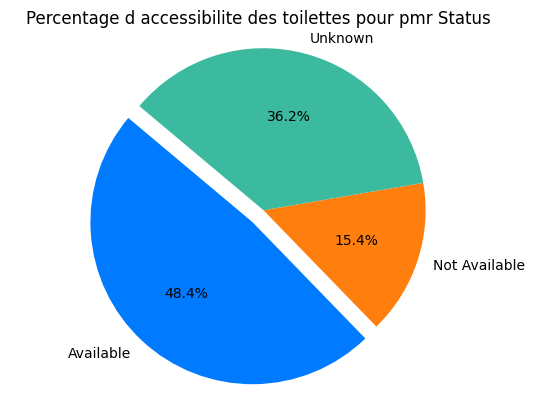

In [30]:
column_name = 'Accessibilite PMR'  # replace with your column name

# count the number of available and not available statuses
available_count = toilettes_publiques_en_ile_de_france['Accessibilite PMR'].eq('Oui').sum()
not_available_count = toilettes_publiques_en_ile_de_france['Accessibilite PMR'].eq('Non').sum()
unknown_count = toilettes_publiques_en_ile_de_france['Accessibilite PMR'].eq('unkown').sum()

# calculate the percentages
available_percentage = (available_count / len(toilettes_publiques_en_ile_de_france)) * 100
not_available_percentage = (not_available_count / len(toilettes_publiques_en_ile_de_france)) * 100
unknown_percentage = (unknown_count / len(toilettes_publiques_en_ile_de_france)) * 100

# create a pie chart
labels = ['Available', 'Not Available', 'Unknown']
sizes = [available_percentage, not_available_percentage, unknown_percentage]
colors = ['#007bff', '#ff7f0e', '#3cba9f']
explode = (0.1, 0, 0)  # explode the available slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)

ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle

plt.title(f'Percentage d accessibilite des toilettes pour pmr Status')
plt.show()

In [31]:
toilettes_publiques_en_ile_de_france.head()

,Source,Accessible au public,Tarif,Accessibilite PMR,Indications de localisation,Type,Horaires d'ouverture,Relais bébé,coord_geo,osm_id,nom_de_la_commune,code_geogrephique_commune,nom_departement,code_geographique_departement
0,Openstreetmap,unkown,Payant,unkown,NaN,Toilettes publiques (Toilettes assises),NaN,NaN,"48.9200123997122, 2.4513652",node/10087287075,Drancy,93029,Seine-Saint-Denis,93
1,Openstreetmap,unkown,Gratuit,Oui,NaN,Toilettes publiques,NaN,Oui,"49.0019035996919, 2.5851414",node/5034240622,Mitry-Mory,77294,Seine-et-Marne,77
2,Openstreetmap,unkown,unkown,unkown,NaN,Toilettes publiques,NaN,NaN,"48.851671118425, 2.28709110685076",way/250866762,Paris,75056,Paris,75
3,Openstreetmap,unkown,Gratuit,Oui,NaN,Toilettes publiques,NaN,NaN,"48.8300881997345, 2.381618",node/10693966635,Paris,75056,Paris,75
4,Openstreetmap,unkown,unkown,Oui,NaN,Toilettes publiques,NaN,NaN,"48.8789719997224, 2.4066627",node/11260376098,Paris,75056,Paris,75


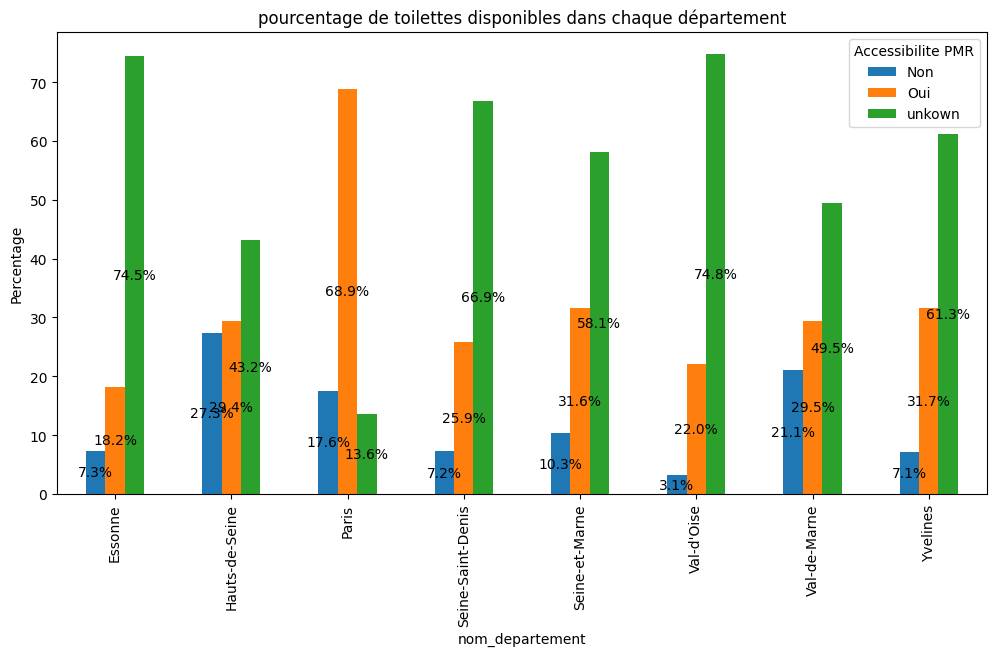

In [32]:
# assume 'df' is your pandas dataframe with the column of interest
column_name = 'nom_departement'  # replace with your column name
status_column = 'Accessibilite PMR'  # replace with your status column name

# create a pivot table to count the number of available and not available for each attribute
pivot_table = pd.pivot_table(toilettes_publiques_en_ile_de_france, index=['nom_departement'], columns=['Accessibilite PMR'], aggfunc='size', fill_value=0)

# calculate the percentages for each attribute
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot_table_percentage.plot(kind='bar', ax=ax)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', horizontalalignment='center', verticalalignment='center')

ax.set_title(f'pourcentage de toilettes disponibles dans chaque département')
ax.set_xlabel(column_name)
ax.set_ylabel('Percentage')
ax.legend(title=status_column)

plt.show()

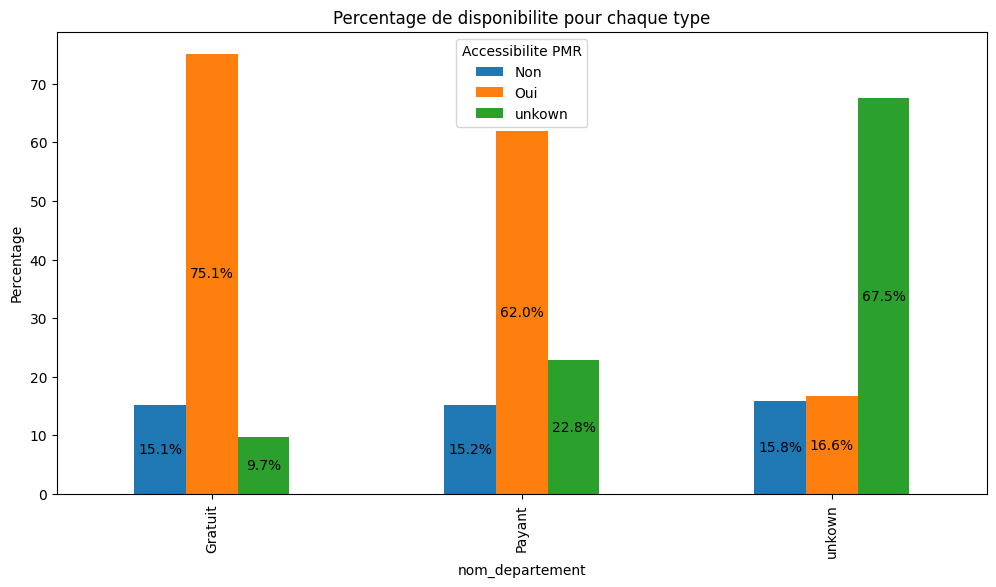

In [33]:
column_name = 'nom_departement'  # replace with your column name
status_column = 'Accessibilite PMR'  # replace with your status column name

# create a pivot table to count the number of available and not available for each attribute
pivot_table = pd.pivot_table(toilettes_publiques_en_ile_de_france, index=['Tarif'], columns=['Accessibilite PMR'], aggfunc='size', fill_value=0)

# calculate the percentages for each attribute
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot_table_percentage.plot(kind='bar', ax=ax)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{height:.1f}%', horizontalalignment='center', verticalalignment='center')

ax.set_title(f'Percentage de disponibilite pour chaque type')
ax.set_xlabel(column_name)
ax.set_ylabel('Percentage')
ax.legend(title=status_column)

plt.show()